In [2]:
# Data visualization
import Bio.SeqIO

for i, record in enumerate(Bio.SeqIO.parse("data/PF00440_rp15.txt", "fasta")):
    if i % 1000 == 0:
        print(i)
        print(record)
        print(str(record.description),":",str(record.seq))

0
ID: A0A2H5ZBW7/12-58
Name: A0A2H5ZBW7/12-58
Description: A0A2H5ZBW7/12-58
Number of features: 0
Seq('ILAAA-L-E-L-F-L-S--E-----G--Y-E-----A-A--TVRA-----IGRR...EAL')
A0A2H5ZBW7/12-58 : ILAAA-L-E-L-F-L-S--E-----G--Y-E-----A-A--TVRA-----IGRRA----G---V-S--D-S-A--LY-Y-Y-F-----E--SKAAILEAL
1000
ID: A0A0C7NWV7/17-60
Name: A0A0C7NWV7/17-60
Description: A0A0C7NWV7/17-60
Number of features: 0
Seq('IMDAA-E-K-L-F-I-Q--K-----G--Y-Q-----N-T--TMTE-----IAKK...---')
A0A0C7NWV7/17-60 : IMDAA-E-K-L-F-I-Q--K-----G--Y-Q-----N-T--TMTE-----IAKKS----K---L-A--K-G-T--LY-L-Y-F-----S--SKKDLY---
2000
ID: A0A7Y6CQV0/16-62
Name: A0A7Y6CQV0/16-62
Description: A0A7Y6CQV0/16-62
Number of features: 0
Seq('IITGA-R-A-C-F-A-E--F-----G--Y-E-----G-A--TVRR-----LEEA...LAV')
A0A7Y6CQV0/16-62 : IITGA-R-A-C-F-A-E--F-----G--Y-E-----G-A--TVRR-----LEEAT----G---L-S--R-G-A--IF-H-H-F-----N--DKEALFLAV
3000
ID: U1LSX4/24-64
Name: U1LSX4/24-64
Description: U1LSX4/24-64
Number of features: 0
Seq('----V-V-E-V-F-N-E--R-----G--Y-D-----A-A--S

In [26]:
str(record.seq)

'-LQTG-L-E-L-F-G-T--L-----G--Y-T-----A-S--TIEI-----LCEHA----G---L-V--K-R-Y--FY-E-S-F-----T--DRADLFR--'

In [78]:
print(ord("A"), ord("B"), ord("Z"), ord("-"), ord("a"), ord("z"))

65 66 90 45 97 122


In [81]:
import Bio.SeqIO
import numpy as np

temp_lim = 1000

def encode_nucleotide(nucleotide):
    nucleotide_int = ord(nucleotide)
    
    if nucleotide == "-":
        return 0
    #elif nucleotide_int < 65 or nucleotide_int > 122 or (nucleotide_int > 90 and nucleotide_int < 97):
    elif nucleotide_int < 65 or nucleotide_int > 90:
        raise ValueError(f"Nucleotide should be uppercase letter or '-', but got: {nucleotide}")
    
    return nucleotide_int - 64


def get_seq_matrix(data_path):
    seq_matrix = np.empty(shape=[temp_lim, 100], dtype=int)
    #seq_matrix = np.array([])
    
    for i, record in enumerate(Bio.SeqIO.parse(data_path, "fasta")):
        #seq_matrix[i] = np.array([encode_nucleotide(n) for n in record.seq])
        seq_matrix[i] = np.array([encode_nucleotide(c.upper()) for c in str(record.seq)])
        
        if i == temp_lim - 1:
            break
        
    return seq_matrix

seq_matrix = get_seq_matrix("data/PF00440_rp15.txt")

In [116]:
seq_matrix_filtered = np.array([], dtype=int)
deleted_indexes = []
filter_threashold = 0.99

for i in range(seq_matrix.shape[1]):
    if np.sum(seq_matrix[:, i] == 0) / seq_matrix.shape[0] > filter_threashold:
        print(f"Filtered {i}")
        deleted_indexes.append(i)
    else:
        if seq_matrix_filtered.shape[0] == 0:
            seq_matrix_filtered = seq_matrix[:, i].reshape(-1, 1)
        else:
            seq_matrix_filtered = np.hstack([seq_matrix_filtered, seq_matrix[:, i].reshape(-1, 1)])

Filtered 5
Filtered 7
Filtered 9
Filtered 11
Filtered 13
Filtered 15
Filtered 17
Filtered 18
Filtered 20
Filtered 21
Filtered 22
Filtered 23
Filtered 24
Filtered 26
Filtered 27
Filtered 29
Filtered 31
Filtered 32
Filtered 33
Filtered 34
Filtered 35
Filtered 37
Filtered 39
Filtered 40
Filtered 45
Filtered 46
Filtered 47
Filtered 48
Filtered 49
Filtered 55
Filtered 56
Filtered 57
Filtered 58
Filtered 60
Filtered 61
Filtered 62
Filtered 64
Filtered 66
Filtered 67
Filtered 69
Filtered 71
Filtered 73
Filtered 74
Filtered 77
Filtered 79
Filtered 81
Filtered 83
Filtered 84
Filtered 85
Filtered 86
Filtered 87
Filtered 89
Filtered 90


In [117]:
seq_matrix_filtered.shape

(1000, 47)

In [118]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

def get_mi_table(seq_matrix):    
    mi_table_size = seq_matrix.shape[1]
    mi_table = np.empty([mi_table_size, mi_table_size])
    
    for i in range(mi_table_size):
        for j in range(mi_table_size):        
            mi_table[i, j] = normalized_mutual_info_score(seq_matrix[:, i], seq_matrix[:, j])
    return mi_table

def get_mi_table_exclude_unknown(seq_matrix):
    mi_table_size = seq_matrix.shape[1]
    mi_table = np.empty([mi_table_size, mi_table_size])
    
    for i in range(mi_table_size):
        for j in range(mi_table_size):
            col_i_filtered = np.array([], dtype=int)
            col_j_filtered = np.array([], dtype=int)
            for k in range(len(seq_matrix[:, j])):
                if seq_matrix[:, i][k] != 0 and seq_matrix[:, j][k] != 0:
                    col_i_filtered = np.append(col_i_filtered, seq_matrix[:, i][k])
                    col_j_filtered = np.append(col_j_filtered, seq_matrix[:, j][k])
            mi_table[i, j] = normalized_mutual_info_score(col_i_filtered, col_j_filtered)
    return mi_table

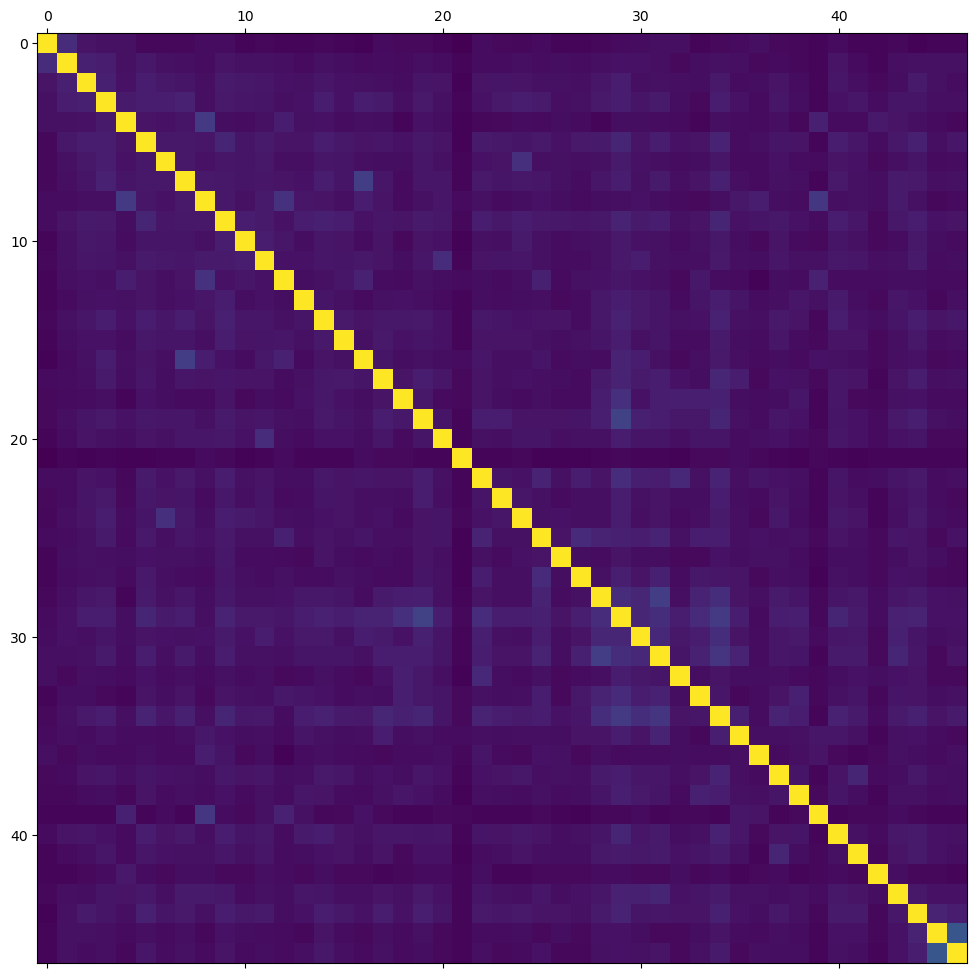

In [114]:
mi_table = get_mi_table(seq_matrix_filtered)
plt.figure(figsize=[10, 10])
plt.matshow(mi_table, fignum=1)

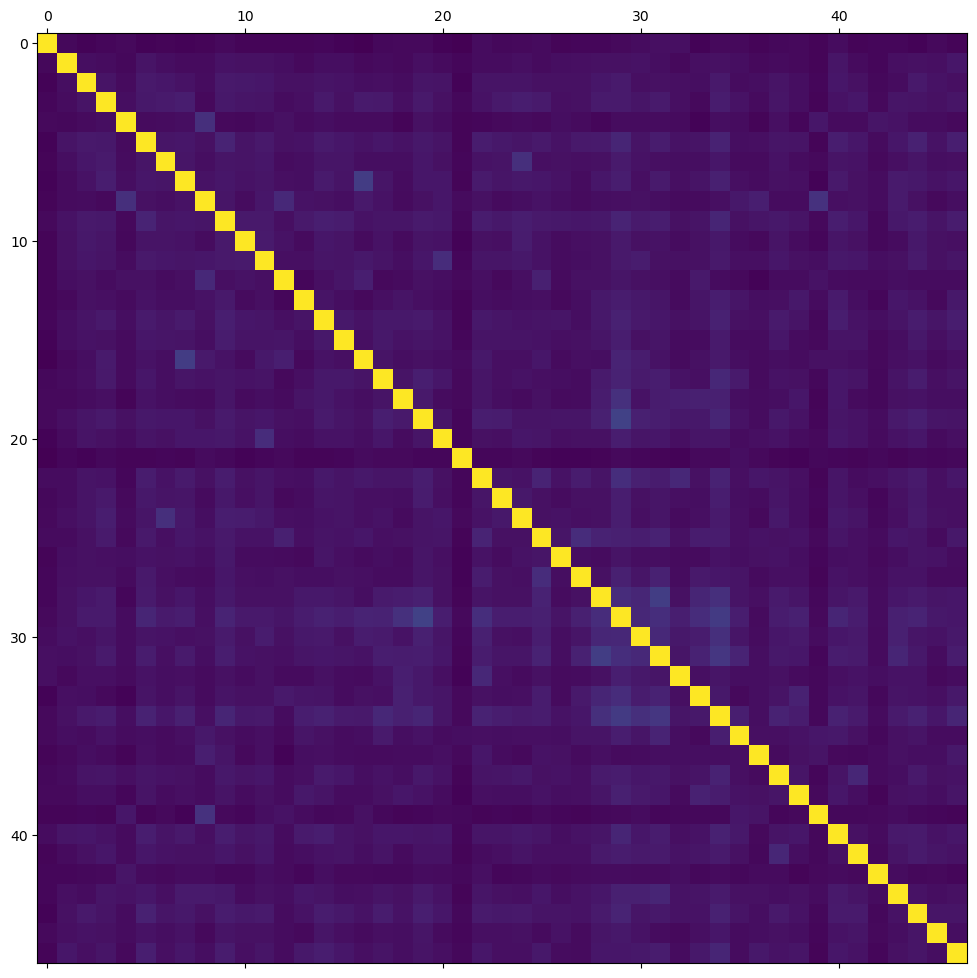

In [113]:
mi_table = get_mi_table_exclude_unknown(seq_matrix_filtered)
plt.figure(figsize=[10, 10])
plt.matshow(mi_table, fignum=1)

In [137]:
mi_table

array([[1.        , 0.1301422 , 0.05538986, ..., 0.01337575, 0.01635982,
        0.01950526],
       [0.1301422 , 1.        , 0.09098921, ..., 0.04721841, 0.04568818,
        0.04827635],
       [0.05538986, 0.09098921, 1.        , ..., 0.07235508, 0.04610948,
        0.03458941],
       ...,
       [0.01337575, 0.04721841, 0.07235508, ..., 1.        , 0.09869891,
        0.07652575],
       [0.01635982, 0.04568818, 0.04610948, ..., 0.09869891, 1.        ,
        0.26904607],
       [0.01950526, 0.04827635, 0.03458941, ..., 0.07652575, 0.26904607,
        1.        ]])

In [139]:
contact_map_threshold = 0.05
contact_map_size = seq_matrix.shape[1]
contact_map = np.empty([contact_map_size, contact_map_size], dtype=int)
last_deleted_index = 0

for i in range(contact_map_size):
    if i in deleted_indexes:
        contact_map[i] = np.zeros((contact_map_size), dtype=int)
        last_deleted_index = i
        continue
    
    next_mi = 0
    for j in range(contact_map_size):
        if j in deleted_indexes:
            contact_map[i][j] = 0
        else:
            mi = mi_table[i - last_deleted_index][next_mi]
            next_mi += 1
            if mi > 0:
                contact_map[i][j] = 1
                
    assert next_mi == len(mi_table[i - last_deleted_index])
        

In [140]:
assert contact_map_size == (len(contact_map.reshape(-1)))**(1/2)

fd = open("my_contacts.lst", "w")
fd.write(str(contact_map_size) + '\n')
for val in contact_map.reshape(-1):
    fd.write(str(val) + '\n')

# Drafts

In [8]:
cov_matrix = np.cov(seq_matrix, rowvar=False)
corr_matrix = np.corrcoef(seq_matrix, rowvar=False)

In [9]:
seq_matrix.shape

(12702, 100)

In [10]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

size = seq_matrix.shape[1]

mutual_info = np.empty(shape=[size, size])

for i in range(size):
    for j in range(size):
        mutual_info[i, j] = normalized_mutual_info_score(seq_matrix[:, i], seq_matrix[:, j])

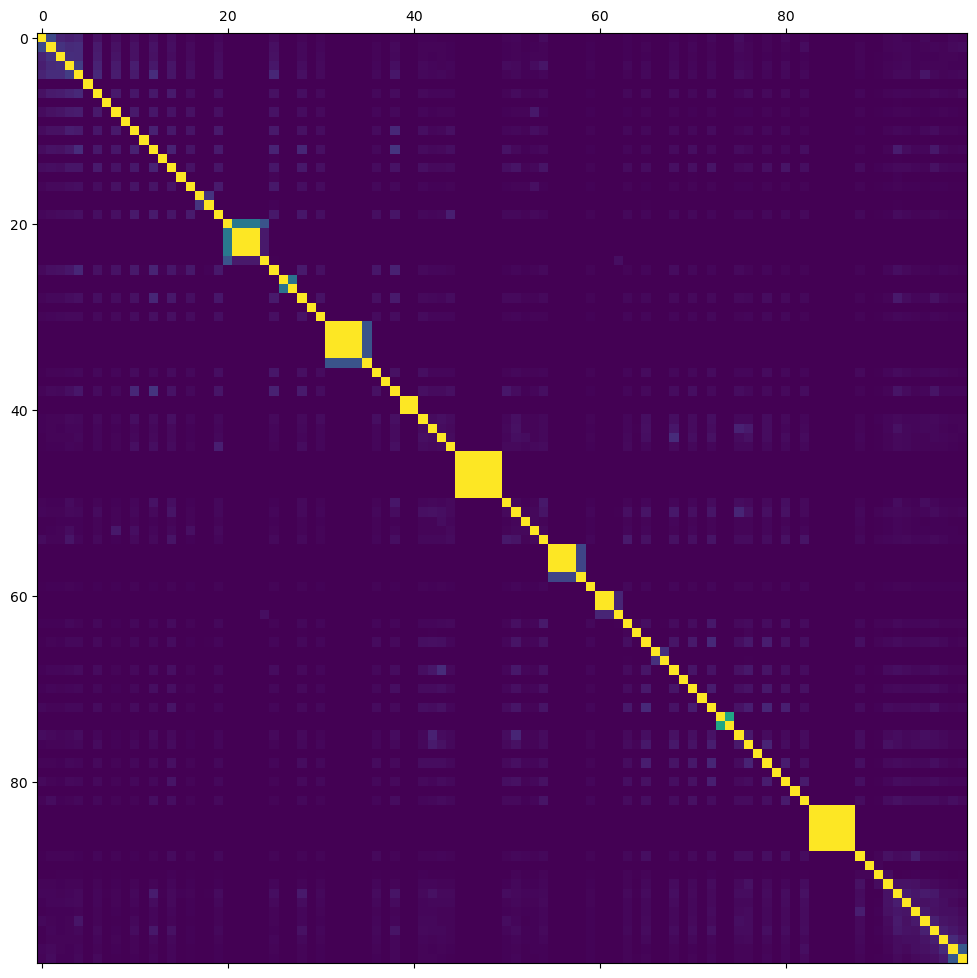

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 12])
plt.matshow(mutual_info, fignum=1)

In [13]:
import sklearn.feature_selection as sk_fs

corr_matrix_sklearn = [sk_fs.mutual_info_classif(seq_matrix, seq_matrix[:, i], discrete_features=True) for i in range(seq_matrix.shape[1])]

In [14]:
corr_matrix_sklearn = np.array(corr_matrix_sklearn)

In [15]:
corr_matrix_sklearn_copy = corr_matrix_sklearn
for i in range(corr_matrix_sklearn_copy.shape[0]):
    corr_matrix_sklearn_copy[i, i] = 0

In [16]:
corr_matrix_sklearn_copy

array([[0.        , 0.27317065, 0.1611702 , ..., 0.01196418, 0.02115188,
        0.01576308],
       [0.27317065, 0.        , 0.27409181, ..., 0.0311959 , 0.03899252,
        0.04336107],
       [0.1611702 , 0.27409181, 0.        , ..., 0.03276788, 0.02463703,
        0.01737793],
       ...,
       [0.01196418, 0.0311959 , 0.03276788, ..., 0.        , 0.23958337,
        0.14403859],
       [0.02115188, 0.03899252, 0.02463703, ..., 0.23958337, 0.        ,
        0.39863665],
       [0.01576308, 0.04336107, 0.01737793, ..., 0.14403859, 0.39863665,
        0.        ]])

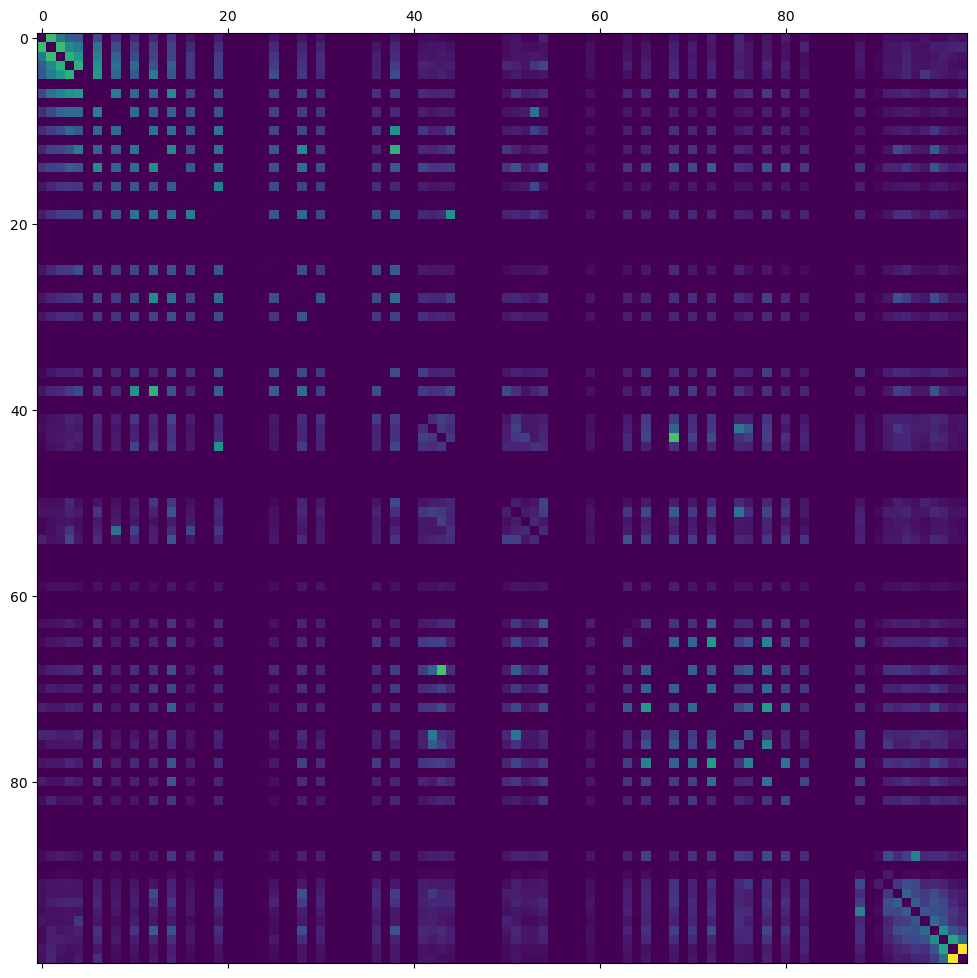

In [17]:
plt.figure(figsize=[12, 12])
plt.matshow(corr_matrix_sklearn, fignum=1)

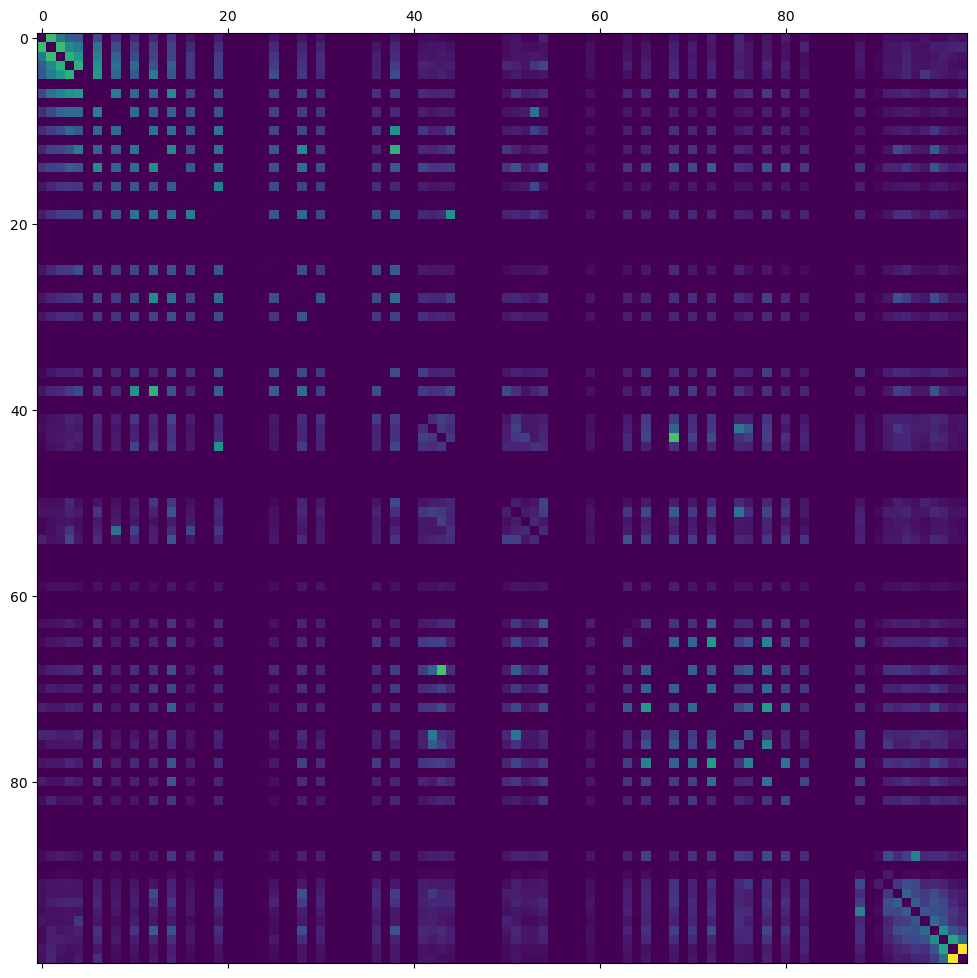

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 12])
plt.matshow(corr_matrix_sklearn_copy, fignum=1)

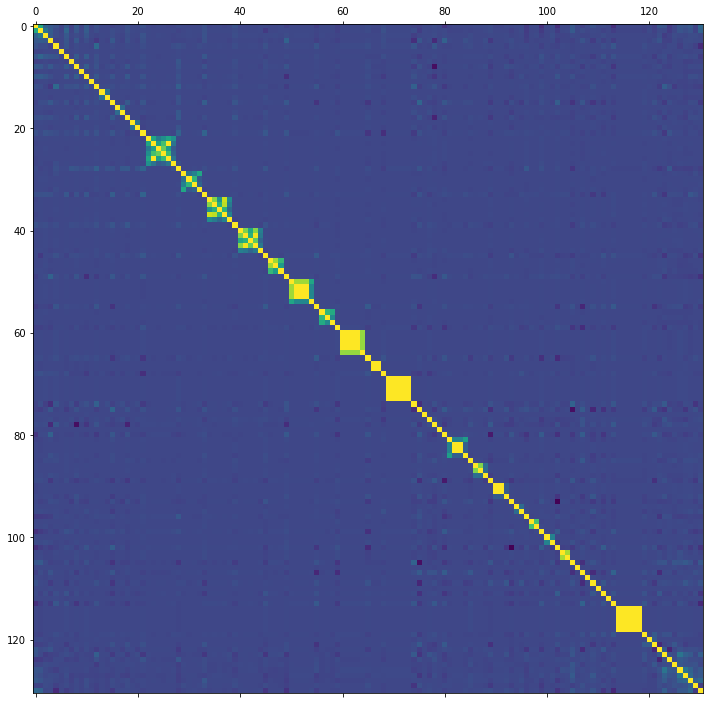

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 12])
plt.matshow(corr_matrix, fignum=1)

In [19]:
from scipy.stats import chi2_contingency
import numpy as np

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi

In [23]:
calc_MI(np.array(seq_matrix[0]), np.array(seq_matrix[1]), 10)

ValueError: The internally computed table of expected frequencies has a zero element at (5, 0).